In [12]:
import pylab 
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt

# Definition

Linear regression - LR is a form on supervised learning, model trained on labeled data. 
Most popular ML method has many real life applications. 
- easy to fit
- easy to interpret

It's important to know:
- edge cases
- different evaluation metrics

The goal is to _Estimate_ a function $f(x)$ such that each feature has linear relationship to the target variable $y$
$$y=X\beta$$

Where: 
- $X$ is matrix of predictor variables and 
- $\beta$ is a vector of parameters that determines the _weight_ of each variable in predicting the target variable $y$

## Fitting the model

The idea of fitting the LM is based on the concept of a residual: the distance between the real data point and model's prediction.

$$X^{(i)}\in\mathbb{R}^d$$

Linear regression estimates the $\beta$ by minimizing the Residual Sum of Squares **RSS**:
$$\text{RSS}(\beta)=(y-X\beta)^T(y-X\beta)$$

**TSS** - Total Sum of Squares\
**ESS** - Explained Sum of Squares\
**RMSE** - Root Mean Squared Error


$$\text{TSS} = \text{ESS} + \text{RSS}$$

$$R^2=1-\tfrac{RSS}{TSS}$$


$R^2$ - goodness of fit ranges `0..1` `represents the proportions of variability in the data explained by the model`

**MSE** - mean squared error - measure the variance of the residuals, penalizes larger errors, more sensitive to outliers\
**MAE** - mean absolute error - measure the average of the residuals.

**What's the expected impactr on the $R^2$ when adding more features to a model?**
 - always increases the $R^2$, does not necessarily make for a better model
More paramateres (features), when testing the $R^2$ should likely also be assessed with model complexity in mind.

Metrics that take into account the number of features of linear regression models include
**AIC** Akaike Information Criterion
**BIC** Bayesian Information Criterion
**Mallow's CP**
**adjusted R^2**

have to consider the model complexity in mo

## **AIC & BIC**

 Both AIC and BIC provide a quantitative measure to evaluate and compare different models, enabling data scientists to make informed decisions.

### AIC

 AIC - aims to estimate the relative quality of different models while penalizing for model complexity. The purpose of AIC is to find a model that maximizes the likelihood of the data while taking into account the number of parameters used.
 $$\text{AIC} = -2\log(L) + 2 k$$

**L** represents the maximized likelihood of the model, which measures how well the model fits the data\
**k** represents the number of parameters in the model, including the intercept and any additional predictors

The calculation of the Likelihood is difficult or with difficulties, the SSE can beused instead

$$\text{AIC} = n \ln(\tfrac{\text{SSE}}{n})+2k$$

**How AIC handles the smaller datasets?**
The AIC has tendrncy to favor more complex models, especially when dealing with smaller datasets. To address these cases the corrected version o the AIC could be used or **AICc**

$$\text{AICc} = \text{AIC} + (2 k (k + 1)) / (n – k – 1)$$

k - represents the number of parameters in the model\
n - represents the sample size\
When we can’t determine the value of likelihood, we use SSE version of AIC as shown above.


**AICc becomes larger** as the number of parameters increases relative to the sample size, effectively penalizing more complex models. By incorporating this correction, AICc provides a more accurate measure of model fit, particularly for smaller sample sizes. As the sample size increases, the correction term in AICc becomes negligible, and the original AIC can be used without the need for correction.

### BIC

**The Bayesian Information Criterion (BIC)** is another model selection criterion that considers both model fit and complexity.

BIC is **based on Bayesian principles** and provides a more stronger penalty for model complexity compared to AIC. The formula for BIC is as follows:

$$BIC = -2\log(L) + k\log(n)$$

In the formula, the terms $\log(L)$ and $k$ have the same meaning as in AIC. Additionally, the term $\log(n)$ represents the logarithm of the sample size (n). The $\log(n)$ term in BIC introduces a stronger penalty for model complexity compared to AIC, as the penalty term scales with the sample size.

The main difference between AIC and BIC lies in the **penalty term for model complexity**. While AIC penalizes complexity to some extent with the term 2 * k, BIC’s penalty increases logarithmically with the sample size, resulting in a more pronounced penalty. 

Therefore, BIC tends to favor simpler models compared to AIC, promoting a more parsimonious approach to model selection.

## $R^2$ or Coefficient of determination

$R^2$ is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 

**More accurattly $R^2$ is `one minus fraction of variance unexplained`**

$R^2=1-\tfrac{RSS}{TSS}=1-\dfrac{\sum{(y_i-\hat{y_i})}}{\sum{(y_i-\bar{y_i})}},\text{were } \hat{y} \text{ - predicted and  } \bar{y} \text{ - mean}$


Adjusted $R^2$ is a modified version of $R^2$ that has been adjusted for the number of predictors in the model.

Adjusted R-squared, a modified version of R-squared, adds precision and reliability by considering the impact of additional independent variables that tend to skew the results of R-squared measurements.



In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# Method for calculating AIC
def calculate_aic(n, sse, k):
    aic = n * np.log(sse / n) + 2 * k
    return aic
# Method for calculating BIC
def calculate_bic(n, sse, k):
    bic = n * np.log(sse / n) + k * np.log(n)
    return bic
# Load the Boston Housing Pricing Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)
# Split the data into predictors (X) and target variable (y)
X = data.drop("medv", axis=1)  # Remove the target variable from predictors
y = data["medv"]
# Fit linear regression model using scikit-learn
reg = LinearRegression()
reg.fit(X, y)
# Calculate SSE
y_pred = reg.predict(X)
sse = np.sum((y - y_pred) ** 2)
# Get number of parameters and sample size
k = reg.coef_.size
n = X.shape[0]
# Calculate AIC and BIC
aic = calculate_aic(n, sse, k)
bic = calculate_bic(n, sse, k)
print("AIC:", aic)
print("BIC:", bic)

AIC: 1587.6427984724191
BIC: 1642.5877751731562


**_How would linear regression be described and explained in layman’s terms?_**

Linear regression is to find the best fitting line given a bunch of points.\
The distance to the line is the “error” - because ideally we prefer every point is on that line.\
Mathematically, we want a line that produces as small total error as possible.\
That’s what we do in linear regression.

**_What is an intuitive explanation of a multivariate regression?_**

Normally regression only has one outcome (Y), and several predictor variables (X).\
In Multivariate regression, there are more than one outcomes (Y).

**_What is gradient descent method? Will gradient descent methods always converge to the same point?_**

Gradient descent is an interative algorithm to find optimal solution. Sometimes, for example, in k-means clustering it will converge to different local optimals with different initializations. In regression, yes, it will always converge to the global optimal point.

**_What is the difference between linear regression and least squares?_**

Linear regression is a statistical inference problem / machine learning model; and least squares describes one way to achieve the solution to the problem/ model. Alternatively, we can use MAE as measurement and gradient descent to find the solution to linear regression model.

# Statistical Perspective

1) Variables are normal distributed. Can check with histogram/ QQ plot. \
 **What** if they are not normaly distributed, what are the ways to address that?
2) Relationship is linear between independent and dependent variables (not polynomial etc.). Scatter plot is helpful in two dimensional case.\
Solution: _change the model to include polynomial terms._

3) No linear dependency between predictors (no multi-collinearity). Use correlation/ covariance matrix to detect.\
Solution: _dimensional reduction (PCA), select one particular variable from highly correlated variable set, or ridge regression (without expecting the coefficient of one single variable explain much)_

4) There is no correlation between error terms (no autocorrelation). This means, dependent variables (y) are independent of each other. Use residual plot or Durbin – Watson test.\
Solution: _time-series modelling_

Last, homoscedasticity. It means the residual remains same as x changes. Scatter plot with x,y,fitting line, residuals is a good measurement.
Solution: log transformation, box-cox transformation

In [15]:
df = pd.read_csv('./data/titanic_train.csv')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


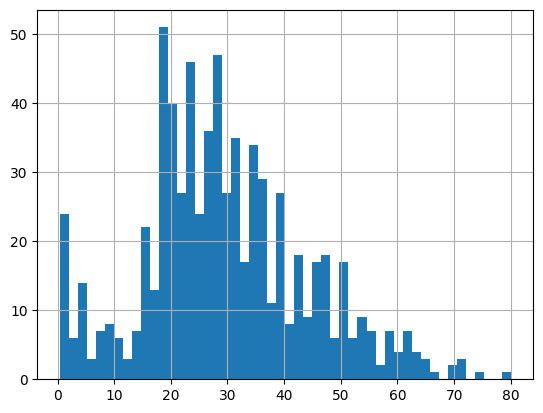

In [17]:
df['Age'].hist(bins=50)
plt.show()

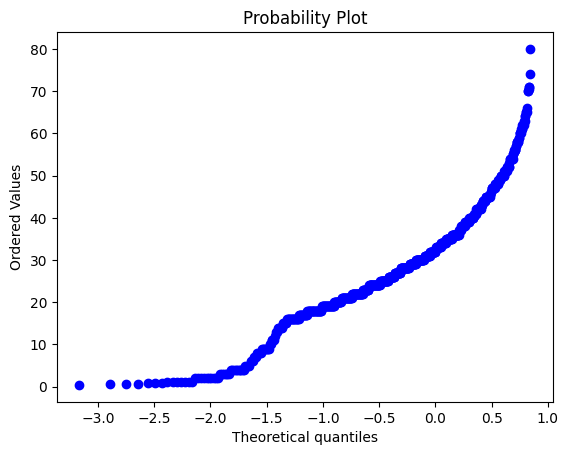

In [18]:
stats.probplot(df['Age'], dist="norm", plot=pylab)
pylab.show()

# source:
https://yoyoinwanderland.github.io/Interview-Linear-Regression/ \
https://towardsdatascience.com/evaluation-metrics-model-selection-in-linear-regression-73c7573208be \
https://vitalflux.com/aic-vs-bic-for-regression-models-formula-examples/\
https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp\
https://en.wikipedia.org/wiki/Coefficient_of_determination